# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [15]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("map_box_api")
type(map_box_api)

Python-dotenv could not parse statement starting at line 3


str

# Import Data

In [3]:
# Import the necessary CSVs to Pandas DataFrames
file_path = Path("C:/Users/sprin/Desktop/uofm-virt-fin-pt-12-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
#sfo_data.head()

file_path = Path("C:/Users/sprin/Desktop/uofm-virt-fin-pt-12-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/neighborhoods_coordinates.csv")
neighborhood_locations = pd.read_csv(file_path)


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [93]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    housing_units_per_year=sfo_data.groupby("year").mean()
    housing_units_per_year.reset_index(inplace=True)
    std=sfo_data["housing_units"].std()
    mins=sfo_data["housing_units"].min()-std
    maxes=sfo_data["housing_units"].max()+std
    housing_units_per_year_fig = px.bar(
    housing_units_per_year,
    x="year",
    y="housing_units",
    range_y=[mins,maxes],
    labels={"year":"Year","sale_price_sqr_foot":"Sales price per Sqft"},
    title="Housing Units in San Francisco from 2010 to 2016",
    width=700, 
    height=600
    )
    return housing_units_per_year_fig
    
    return pn.pane.Matplotlib(housing_units_per_year_fig)   

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    average_gross_rent = sfo_data["gross_rent"].groupby("year").mean()
    average_gross_rent_per_year_fig = px.line(
    average_gross_rent,
    y="gross_rent",
    labels={"year":"Year","gross_rent":"Gross_rent"},
    title="Average Gross Rent per Year",
    width=700, 
    height=600
          )
    return average_gross_rent_per_year_fig
    
    return pn.pane.Matplotlib(average_gross_rent_per_year_fig) 

    
def average_sales_price():
    """Average Sales Price Per Year."""
    average_sale_price_per_square = sfo_data[ "sale_price_sqr_foot"].groupby("year").mean()
    average_sale_price_per_squre_foot_fig = px.line(
    average_sale_price_per_square,
    y="sale_price_sqr_foot",
    labels={"year":"Year","sale_price_sqr_foot":"Sale_price_sqr_foot"},
    title="Average Sales Price Per Year",
    width=700, 
    height=600
        )
    return average_sale_price_per_squre_foot_fig

    return pn.pane.Matplotlib(average_sale_price_per_squre_foot_fig) 


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    average_prices_by_neighborhood = sfo_data.groupby(["year","neighborhood"]).mean()
    average_prices_by_neighborhood.reset_index(inplace=True)
    average_prices_by_neighborhood_plot = average_prices_by_neighborhood.hvplot.line(x='year',y="sale_price_sqr_foot",ylabel='Avg. Sale Price per Square Foot',groupby='neighborhood')
    return average_prices_by_neighborhood_plot


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    top_10 = sfo_data.groupby("neighborhood").mean()
    top_10 = top_10.sort_values(by="sale_price_sqr_foot", ascending=False)
    top_10_expensive = top_10.head(10)
    top_10_expensive.reset_index(inplace=True)
    top_10_expensive.head()
    top_10_expensive_plot =  top_10.hvplot.bar(x='neighborhood',y="sale_price_sqr_foot",ylabel='Avg. Sale Price per Square Foot',rot=90,width=800,height=460)
    return top_10_expensive_plot

def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    
    
    top_10_rent = sfo_data.groupby("neighborhood").mean()
    top_10_rent = top_10_rent.sort_values(by="gross_rent", ascending=False)
    top_10_expensive_rent = top_10_rent.head(10)
    top_10_expensive_rent.reset_index(inplace=True)
    top_10_expensive_rent.head()
    top_10_expensive_rent_plot =  top_10_rent.hvplot.bar(x='neighborhood',y="gross_rent",ylabel='Gross Rent',rot=90,width=800,height=460)
    return top_10_expensive_rent_plot
    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    avg_neighborhood = sfo_data.groupby("neighborhood").mean()
    avg_neighborhood = avg_neighborhood.sort_values(by="sale_price_sqr_foot", ascending=False)
    avg_neighborhood_top_10 = top_10_rent.head(10)
    avg_neighborhood_top_10.reset_index(inplace=True)
    avg_neighborhood_top_10_plot_parra_coor = px.parallel_coordinates(avg_neighborhood_top_10, color='sale_price_sqr_foot')
    return avg_neighborhood_top_10_plot_parra_coor



def parallel_categories():
    """Parallel Categories Plot."""
    
    avg_neighborhood = sfo_data.groupby("neighborhood").mean()
    avg_neighborhood = avg_neighborhood.sort_values(by="sale_price_sqr_foot", ascending=False)
    avg_neighborhood_top_10 = avg_neighborhood.head(10)
    avg_neighborhood_top_10.reset_index(inplace=True)
    avg_neighborhood_top_10_plot_parra_cat = px.parallel_coordinates(avg_neighborhood_top_10, dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color='sale_price_sqr_foot')
    return avg_neighborhood_top_10_plot_parra_cat


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [120]:
# Create a Title for the Dashboard
# Create a tab layout for the dashboard
# Create the dashboard
Title = pn.pane.Markdown(
"""
##Real Estate Analysis of San Francisco from 2010-2016##
The goal of this dashboard is to provide charts, maps, and interactive visualizations that help customers explore the data and determine if they want to invest in rental properties in San Francisco.
"""
)
welcome_tab = pn.Row(pn.Column(title))
tab_1_columns = pn.Column(housing_units_per_year, average_gross_rent, average_sales_price)
tab_2_columns = pn.Column(top_most_expensive_neighborhoods, most_expensive_neighborhoods_rent_sales,parallel_categories)    
tab_3_columns = pn.Column(average_price_by_neighborhood,parallel_categories)
# Create tabs

panel= pn.Tabs(
("Welcome", Title),
("Yearly Market Analysis", tab_1_columns),
("Neighborhood Analysis", tab_2_columns), 
("Interactive Market Analysis by Neighborhood", tab_3_columns))

## Serve the Panel Dashboard

In [121]:
# Serve the# dashboard
panel.servable()

Tabs
    [0] Markdown(str)
    [1] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive13537')
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive13543')
        [2] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive13549')
    [2] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive13556')
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive13640')
        [2] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive13724')
    [3] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive13731')
                    [0] HoloViews(DynamicMap, name='interactive13731')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                        [1] VSpacer()
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive13768')

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

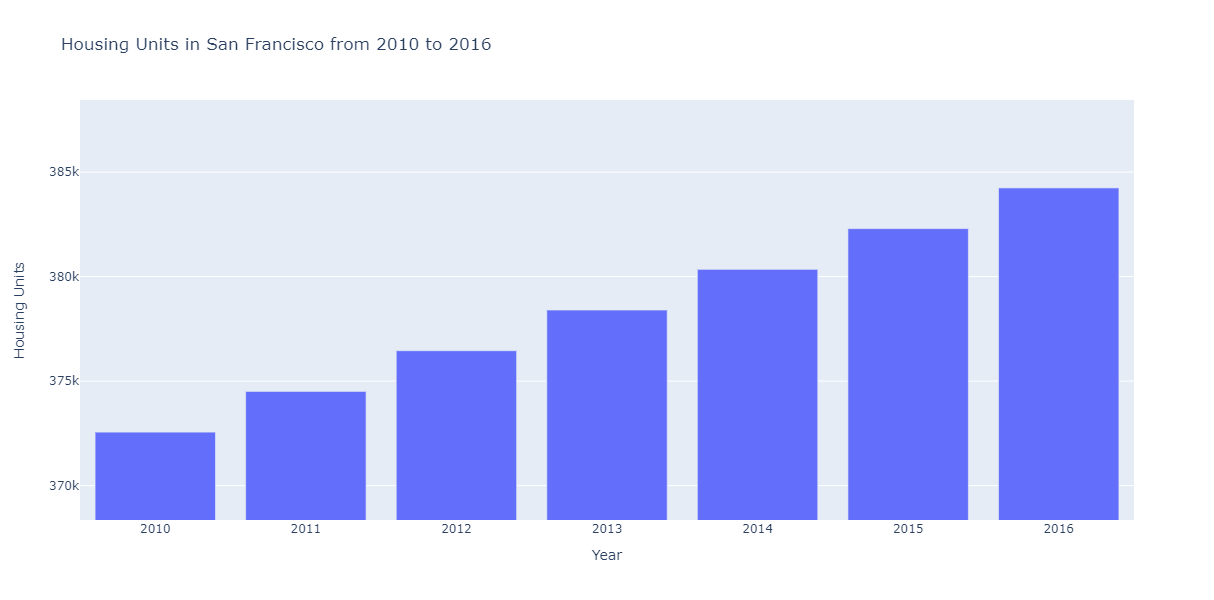

In [83]:
 #housing_units_per_year()

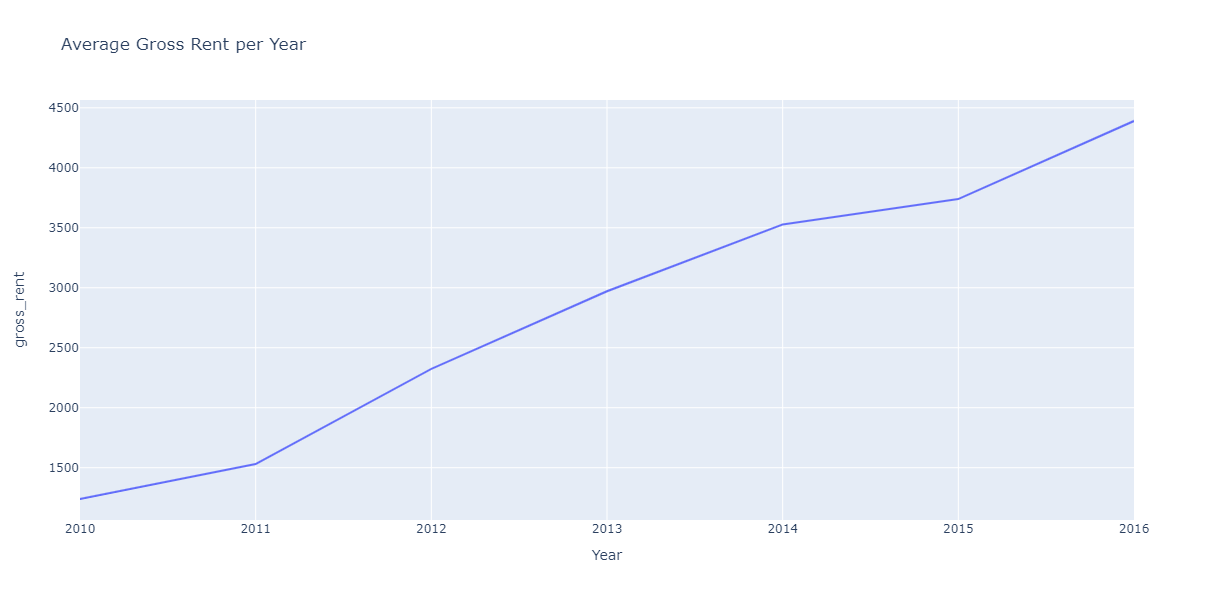

In [129]:
#average_gross_rent()

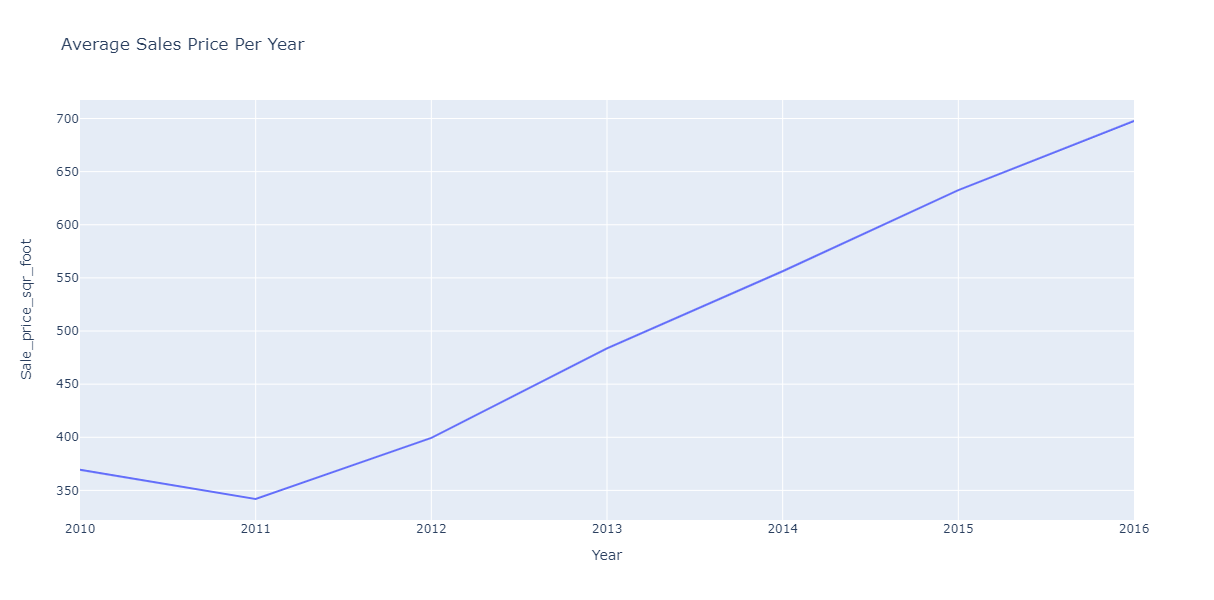

In [137]:
#average_sales_price()

In [21]:
#average_price_by_neighborhood()

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [29]:
#top_most_expensive_neighborhoods()

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [36]:
#most_expensive_neighborhoods_rent_sales()

:Bars   [neighborhood]   (gross_rent)

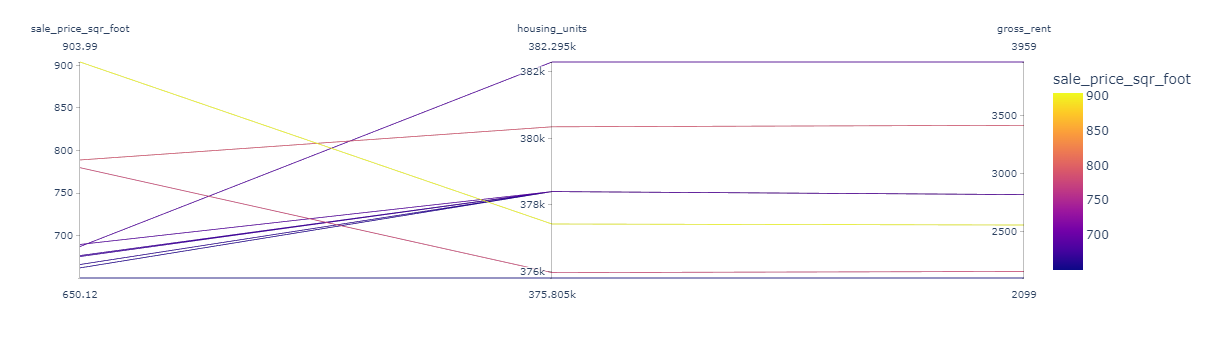

In [63]:
#parallel_coordinates()